   Season         Driver  Races  AvgQuali  AvgFinish  Podiums  Wins  \
0    2024   Lando Norris     24  3.541667   4.291667       13     4   
1    2024  Oscar Piastri     24  5.416667   5.125000        8     2   
2    2025   Lando Norris     24  2.958333   4.250000       18     7   
3    2025  Oscar Piastri     24  3.041667   4.208333       16     7   

   AvgRaceLap  
0   92.549292  
1   92.908244  
2   91.066167  
3   90.474986  


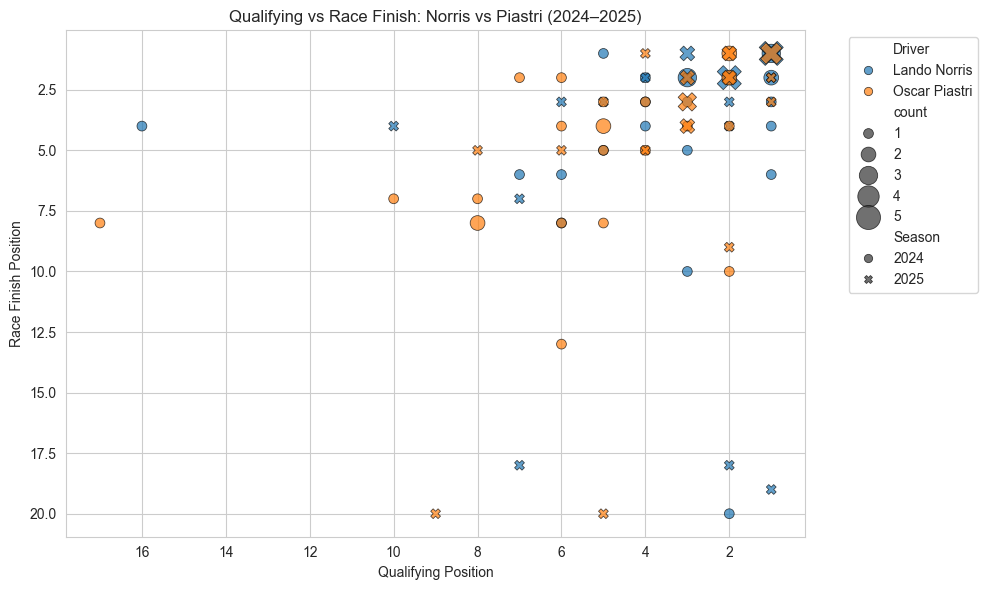

C:\Users\raima\AppData\Local\Temp\ipykernel_23288\1534512775.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


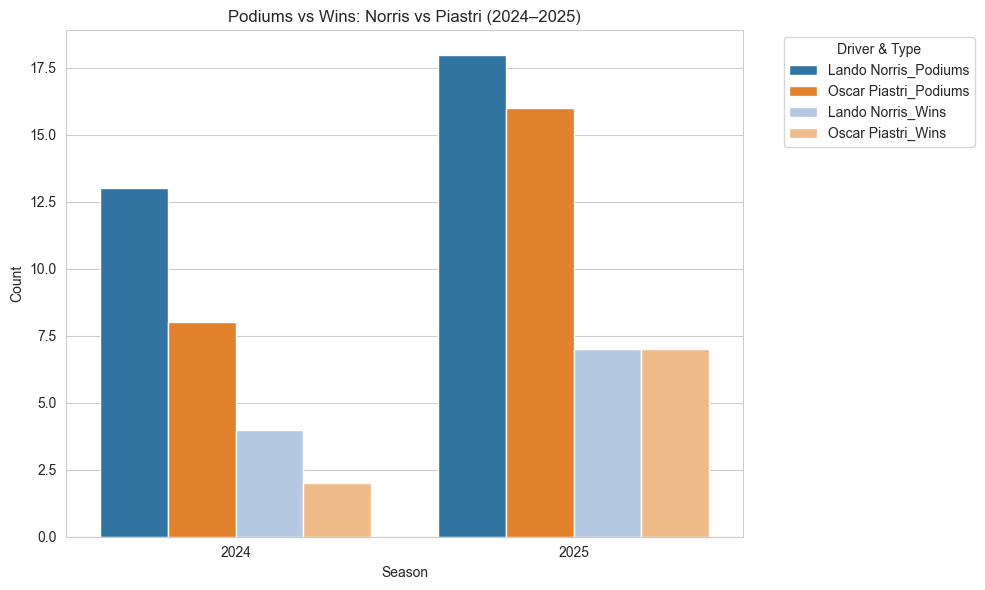

C:\Users\raima\AppData\Local\Temp\ipykernel_23288\1534512775.py:94: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


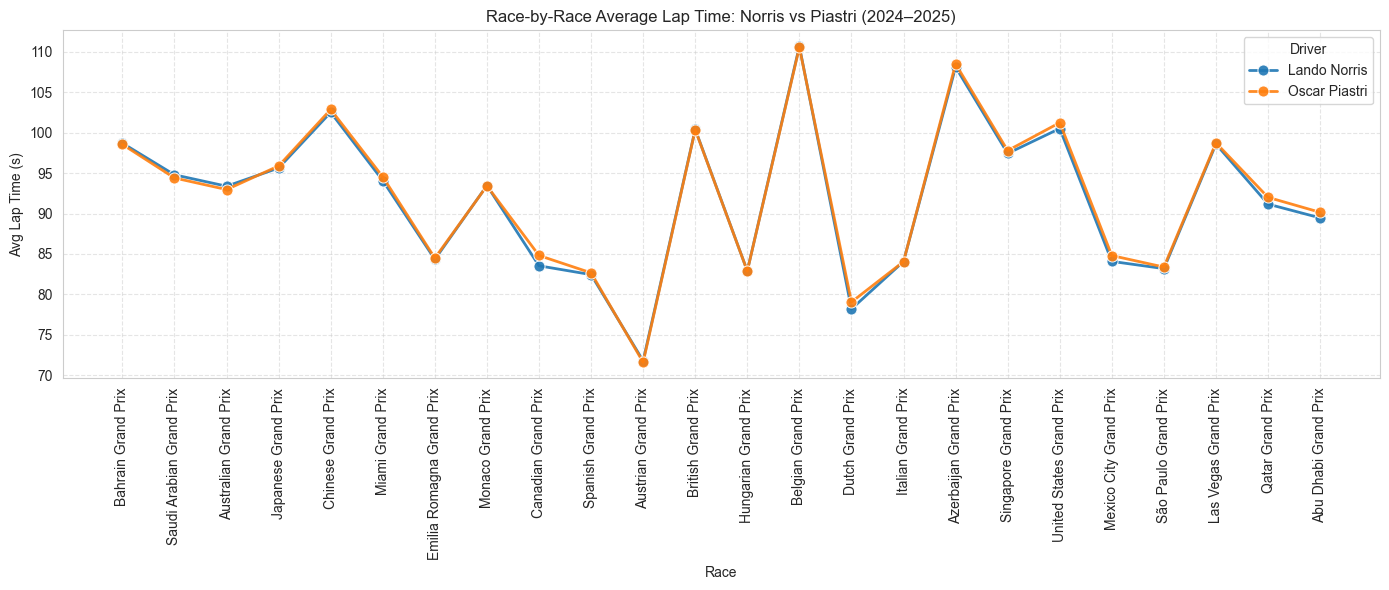

C:\Users\raima\AppData\Local\Temp\ipykernel_23288\1534512775.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


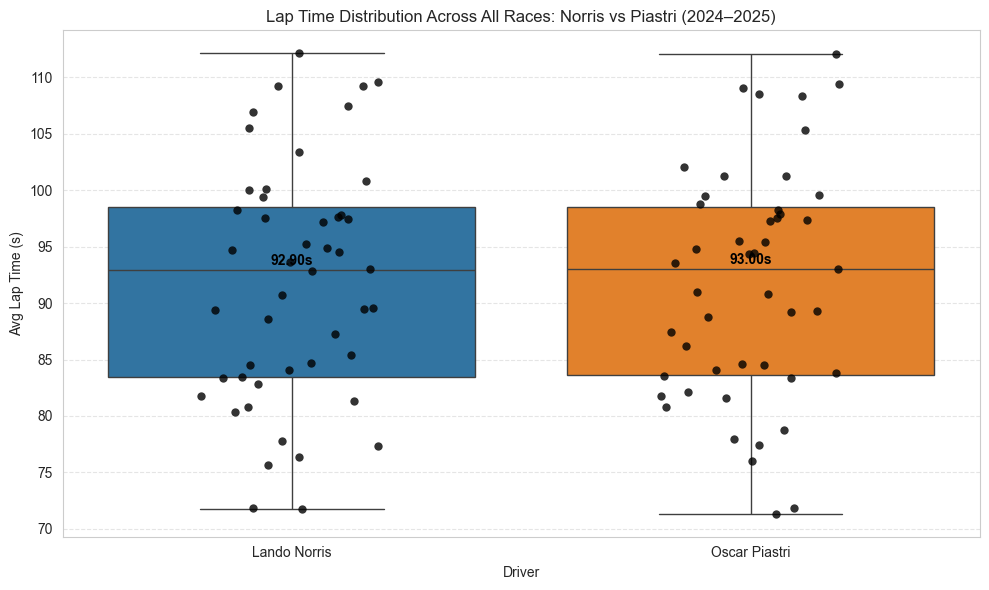

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load and preprocess data
df = pd.read_csv("lando_oscar_race_data_2024_2025.csv")

# Convert relevant columns to numeric
df["QualiPos"] = pd.to_numeric(df["QualiPos"], errors="coerce")
df["FinishPos"] = pd.to_numeric(df["FinishPos"], errors="coerce")
df["AvgLapTime_s"] = pd.to_numeric(df["AvgLapTime_s"], errors="coerce")  # handle missing lap times

# Summarize key stats per season and driver
summary = df.groupby(["Season", "Driver"]).agg(
    Races=("Race", "count"),         # total races
    AvgQuali=("QualiPos", "mean"),   # average qualifying position
    AvgFinish=("FinishPos", "mean"), # average race finish position
    Podiums=("Podium", "sum"),       # total podiums
    Wins=("Win", "sum"),             # total wins
    AvgRaceLap=("AvgLapTime_s", "mean")  # average lap time
).reset_index()

# Save summary to CSV
summary.to_csv("lando_oscar_summary_2024_2025.csv", index=False)
print(summary)

# Count overlapping Quali-Finish combinations for scatter plot
counts = df.groupby(["QualiPos", "FinishPos", "Driver", "Season"]).size().reset_index(name="count")

# Scatter plot of Qualifying vs Race Finish
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=counts,
    x="QualiPos",
    y="FinishPos",
    hue="Driver",
    style="Season",
    size="count",
    sizes=(50, 300),
    alpha=0.7,
    edgecolor="black"
)
plt.gca().invert_xaxis()  # lower qualifying is better
plt.gca().invert_yaxis()  # lower finish is better
plt.title("Qualifying vs Race Finish: Norris vs Piastri (2024–2025)")
plt.xlabel("Qualifying Position")
plt.ylabel("Race Finish Position")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.savefig("graphs/quali_vs_finish.png")
plt.show()

# Prepare data for Podiums vs Wins bar chart
combined = summary.melt(
    id_vars=["Season", "Driver"],
    value_vars=["Podiums", "Wins"],
    var_name="Type",
    value_name="Count"
)

# Combine driver and type for coloring
combined["Driver_Type"] = combined["Driver"] + "_" + combined["Type"]

# Define colors for each driver and type
palette = {
    "Lando Norris_Podiums": "#1f77b4",
    "Lando Norris_Wins": "#aec7e8",
    "Oscar Piastri_Podiums": "#ff7f0e",
    "Oscar Piastri_Wins": "#ffbb78"
}

# Grouped bar chart for Podiums and Wins
plt.figure(figsize=(10,6))
sns.barplot(
    data=combined,
    x="Season",
    y="Count",
    hue="Driver_Type",
    ci=None,
    dodge=True,
    palette=palette
)
plt.title("Podiums vs Wins: Norris vs Piastri (2024–2025)")
plt.ylabel("Count")
plt.xlabel("Season")
plt.legend(title="Driver & Type", bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.savefig("graphs/podiums_wins_clear.png")
plt.show()

# Line plot for race-by-race average lap times
plt.figure(figsize=(14,6))
sns.lineplot(
    data=df,
    x="Race",
    y="AvgLapTime_s",
    hue="Driver",
    marker="o",
    linewidth=2,
    markersize=8,
    alpha=0.9,
    ci=None  # no confidence interval shading
)
plt.xticks(rotation=90)
plt.ylabel("Avg Lap Time (s)")
plt.xlabel("Race")
plt.title("Race-by-Race Average Lap Time: Norris vs Piastri (2024–2025)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Driver")
plt.tight_layout()
plt.savefig("graphs/lap_time_lineplot.png")
plt.show()

# Boxplot and stripplot for lap time distribution
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="Driver",
    y="AvgLapTime_s",
    palette={"Lando Norris":"#1f77b4", "Oscar Piastri":"#ff7f0e"},
    showfliers=False  # hide outliers for clarity
)
sns.stripplot(
    data=df,
    x="Driver",
    y="AvgLapTime_s",
    color="black",
    size=6,
    jitter=0.2,
    alpha=0.8
)

# Annotate median lap times on the boxplot
medians = df.groupby("Driver")["AvgLapTime_s"].median()
for i, driver in enumerate(medians.index):
    median_val = medians[driver]
    plt.text(
        i,
        median_val + 0.5,
        f"{median_val:.2f}s",
        horizontalalignment='center',
        color='black',
        weight='bold'
    )

plt.ylabel("Avg Lap Time (s)")
plt.title("Lap Time Distribution Across All Races: Norris vs Piastri (2024–2025)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("graphs/lap_time_distribution_clear.png")
plt.show()
